## Кластерный анализ торговых сессий


In [8]:
from preprocess import preprocessing
from cluster import clustering, normalize
from visualize import plot

In [2]:
data = preprocessing()

In [3]:
X_train = data['weighted_price'].values.reshape((-1, 60))
print(X_train.shape)

(51, 60)


### DTW

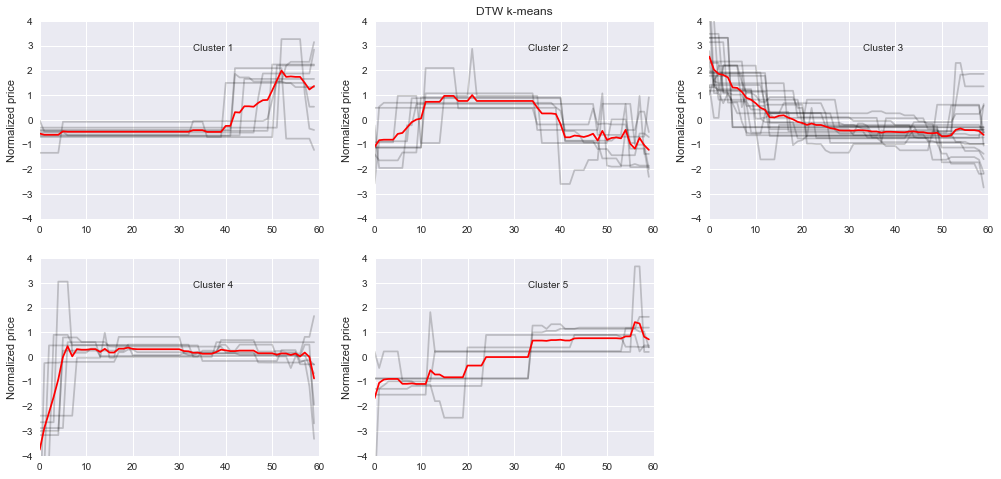

In [4]:
y_pred = clustering(X_train, metric='dtw', num_clusters=5)
plot(y_pred, normalize(X_train).squeeze(), title='DTW k-means')

### Выводы по k-means с dtw метрикой:
- Выделяется примерно 5 кластеров торговых сессий 
- __1 кластер__ - цена сначала не изменяется, но ближе к концу сессии происходият операции с повышением цены
- __2 кластер__ - цена постепенно возрастает в начале сессии, а ближе к концу - постепенно падает
- __3 кластер__ - цена падает на протяжении всей сессии
- __4 кластер__ - цена резко возрастает в начале сессии, далее почти не изменяется, в конце - падает
- __5 кластер__ - цена повышается на протяжении всей сессии

В целом, метрика *dtw* позволяет находить схожие паттерны

### L2-norm

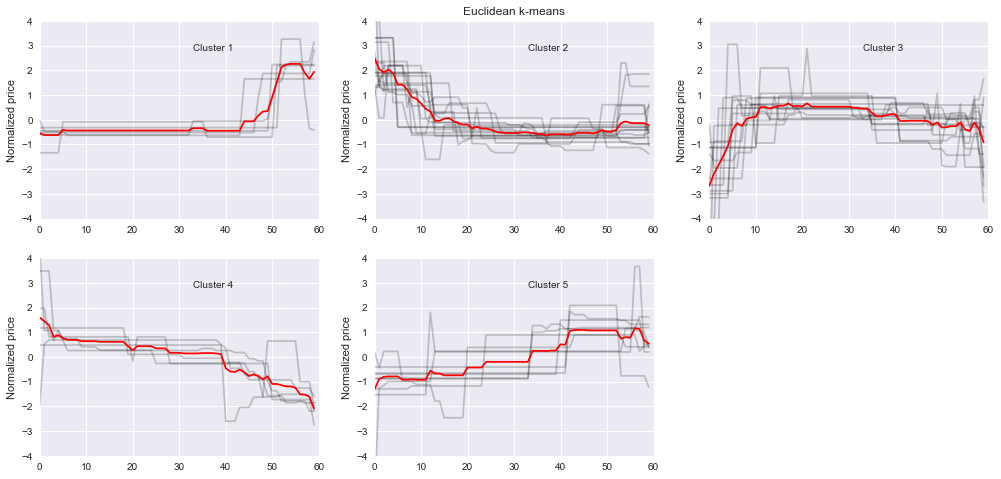

In [5]:
y_pred = clustering(X_train, metric='l2', num_clusters=5)
plot(y_pred, normalize(X_train).squeeze(), title='Euclidean k-means')

### Выводы по k-means с L2 расстоянием (классический k-means):
- Выделяется 5 кластеров торговых сессий 
- __1 кластер__ - цена сначала не изменяется, но ближе к концу сессии происходият операции с повышением цены
- __2 кластер__ - цена понижается в начале сессии и немного возрастает к концу сессии
- __3 кластер__ - цена резко возрастает в начале сессии, далее почти не изменяется, в конце - падает
- __4 кластер__ - цена падает на протяжении всей сессии
- __5 кластер__ - цена растет на протяжении всей сессии

*L2* расстояние также хорошо позволяет находить схожие паттерны, 4 из 5 кластеров похожи на кластеры полученные с помощью *dtw*

### MAE

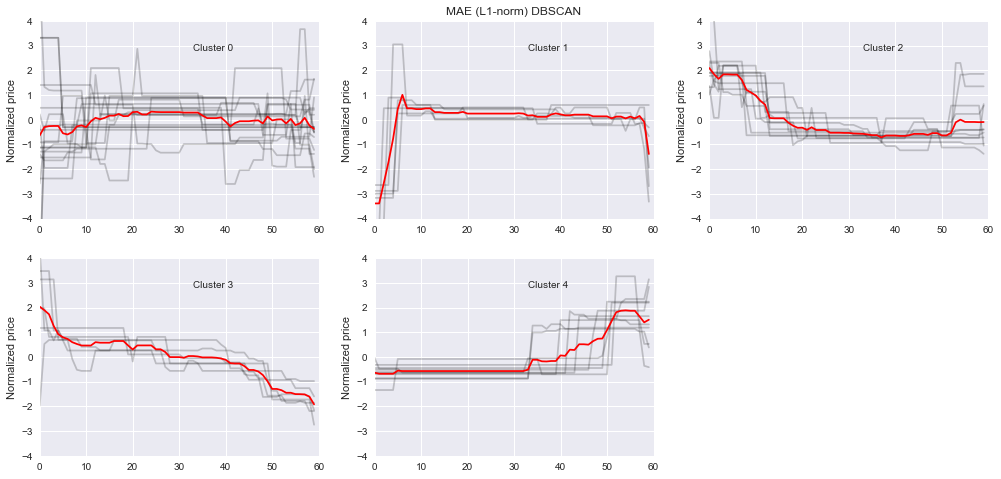

In [6]:
y_pred = clustering(X_train, metric='MAE')
plot(y_pred, normalize(X_train).squeeze(), title='MAE (L1-norm) DBSCAN')

### Выводы по DBSCAN с MAE (L1-нормой):
__0 кластер__ в DBSCAN означает выбросы, т.е. торговые сессии, в которых нет схожих паттернов с другими группами

- Выделяется 4 кластера торговых сессий 
- __1 кластер__ - цена резко возрастает в начале сессии, далее почти не изменяется, в конце - падает
- __2 кластер__ - цена понижается в начале сессии и немного возрастает к концу сессии
- __3 кластер__ - цена падает на протяжении всей сессии
- __4 кластер__ - цена растет на протяжении всей сессии

*DBSCAN* выделил меньше паттернов, опредилось 4 кластера, а не 5. Но выделенные кластеры действительно объединяют схожие сессии


### Cosine

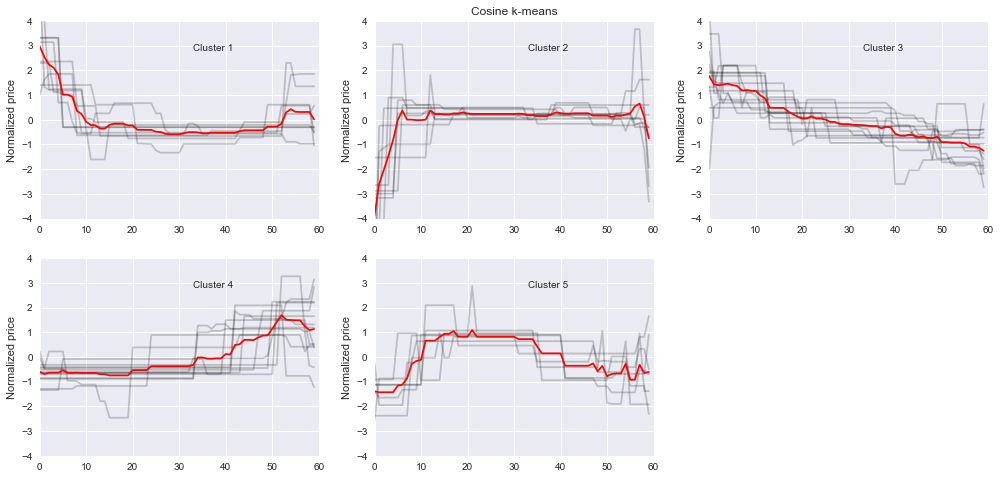

In [7]:
y_pred = clustering(X_train, metric='cosine', num_clusters=5)
plot(y_pred, normalize(X_train).squeeze(), title='Cosine k-means')

### Выводы по Cosine k_means:

- Выделяется 5 кластеров торговых сессий 
- __1 кластер__ - цена понижается в начале сессии и возрастает к концу сессии
- __2 кластер__ - цена резко возрастает в начале сессии, далее почти не изменяется, в конце - падает
- __3 кластер__ - цена падает на протяжении всей сессии
- __4 кластер__ - цена растет на протяжении всей сессии
- __5 кластер__ - цена постепенно возрастает в начале сессии, а ближе к концу - постепенно падает

В целом, результаты с *косинусным расстоянием* похожи на результаты с *dtw*, выделяются примерно такие же кластеры

### Общие выводы

__Таким образом, все метрики показывают примерно идентичный результат__, торговые сессии разбиваются на действительно похожие между собой группы

- *DBSCAN с MAE* определил меньшее число кластеров, много сессий были обозначены как выбросы, остальные выделенные группы выглядят как очень схожие между собой торговые сессии
- Остальные алгоритмы показали примерно одинаковый результат, предпочтительнее, наверное, использовать *Cosine* или *dtw*, т.к. результаты практически идентичны